# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

**Sumber Dataset**:  
- Dataset: [Kaggle](https://www.kaggle.com/c/titanic/data)

**Titanic - Machine Learning from Disaster**

Dataset Titanic adalah salah satu dataset paling populer dalam pembelajaran data science dan machine learning. Dataset ini berasal dari tragedi tenggelamnya kapal RMS Titanic pada tahun 1912, yang menewaskan lebih dari 1.500 penumpang dan awak dari total sekitar 2.200 orang.

Tujuan utama dari dataset ini adalah memprediksi siapa yang selamat (Survived) berdasarkan informasi penumpang, seperti usia, jenis kelamin, kelas tiket, dan sebagainya. Dataset ini sering digunakan sebagai studi kasus pengenalan supervised learning, terutama klasifikasi biner.




# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../titanic_raw/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

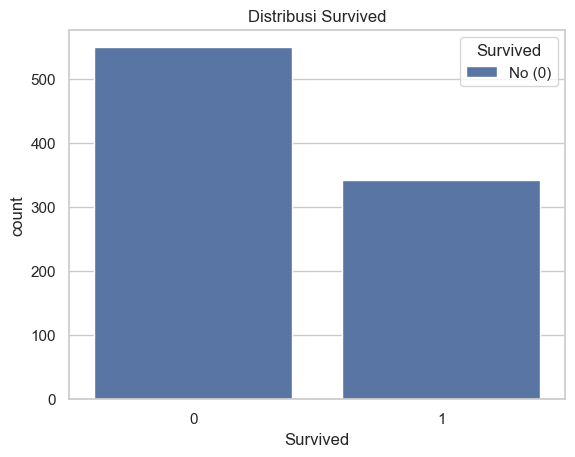

In [8]:
# Visualisasi distribusi target
sns.set(style='whitegrid')
sns.countplot(x="Survived", data=df)
plt.title("Distribusi Survived")
plt.legend(labels=["No (0)"], title="Survived")
plt.show()

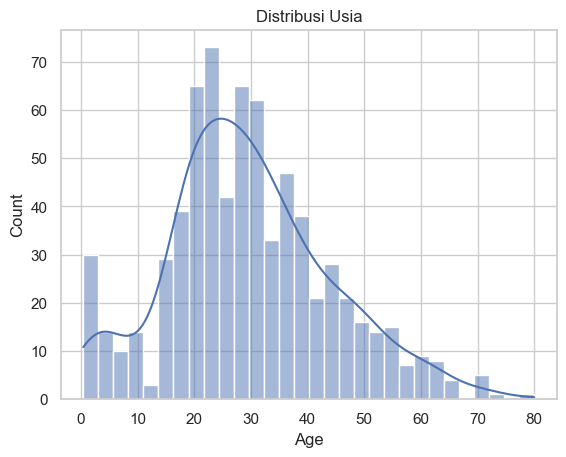

In [9]:
# Distribusi usia
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribusi Usia")
plt.show()

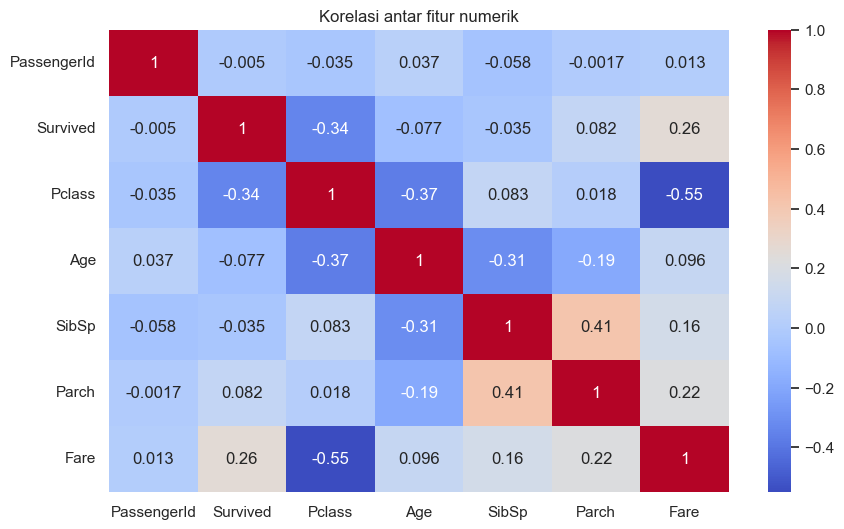

In [10]:
# Korelasi numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()

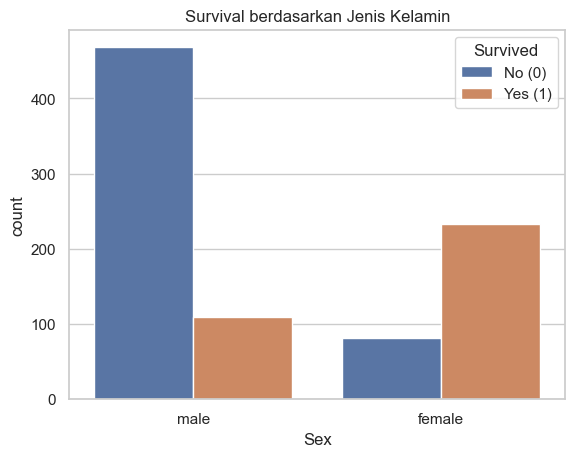

In [11]:
# Perbandingan survival berdasarkan jenis kelamin
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival berdasarkan Jenis Kelamin")
plt.legend(labels=["No (0)", "Yes (1)"], title="Survived")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Cek kembali missing value
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop kolom (karena sebagian besar kosong)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
# Drop kolom yang tidak digunakan
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [15]:
df.to_csv('cleaned_data.csv')

In [16]:
df_clean = pd.read_csv('cleaned_data.csv')

In [17]:
df_clean

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S
887,887,1,1,female,19.0,0,0,30.0000,S
888,888,0,3,female,28.0,1,2,23.4500,S
889,889,1,1,male,26.0,0,0,30.0000,C


**3. Proses Normalisasi, Standarisasi, dan Encoding**

In [18]:
num_columns = ['Age', 'Fare']
ordinal_columns = []  # Tidak ada fitur ordinal di dataset Titanic
nominal_columns = ['Sex', 'Embarked']

In [19]:
num_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),
    ('scaler', StandardScaler())
])

ordinal_pipeline = Pipeline([
    ('ord_encoder', OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ('nom_encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_columns),
    ('ordinal_pipeline', ordinal_pipeline, ordinal_columns),
    ('nominal_pipeline', nominal_pipeline, nominal_columns)
]).set_output(transform='pandas')

In [20]:
X = df.drop(columns='Survived')
y = df['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_Validtrain shape -- ', X_valid.shape)
print('y_Valid shape -- ', y_valid.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (569, 7)
y_train shape --  (569,)
X_Validtrain shape --  (143, 7)
y_Valid shape --  (143,)
X_test shape --  (179, 7)
y_test shape --  (179,)


In [22]:
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)
X_test_processed = preprocessor.transform(X_test)

In [23]:
X_test_processed.to_csv('test_preprocess.csv')

In [24]:
X_valid_processed.to_csv('valid_preprocess.csv')

In [25]:
X_train_processed.to_csv('train_preprocess.csv')

In [26]:
X_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 709 to 10
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_pipeline__Age             179 non-null    float64
 1   num_pipeline__Fare            179 non-null    float64
 2   nominal_pipeline__Sex_male    179 non-null    float64
 3   nominal_pipeline__Embarked_Q  179 non-null    float64
 4   nominal_pipeline__Embarked_S  179 non-null    float64
dtypes: float64(5)
memory usage: 8.4 KB
